In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import pylab as pl

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.model_selection import KFold

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
sns.set(font_scale = 1.7)
data = pd.read_csv('/content/wholedata.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. preprosessing

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
pd.options.display.max_columns = None

import seaborn as sns
pd.set_option('max_columns',200)
pd.set_option('max_rows',200)
from sklearn.ensemble import RandomForestRegressor
#记住这里是在做regression，所以import的是randomforestregressor


In [3]:
data = pd.read_csv('/content/wholedata.csv')
print(data.shape)
data.head()

(18249, 70)


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month,winter,spring,summer,autumn,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data_train = pd.read_csv('/content/wholedata.csv')
data_test = pd.read_csv('/content/wholedata.csv')
data_train.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month,winter,spring,summer,autumn,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data.drop('AveragePrice',axis=1)
feature_list = list(X.columns)
print(len(feature_list))

y = data['AveragePrice']

X = X.values
y = y.values
print(X.shape,y.shape)

69
(18249, 69) (18249,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)
print(X_train.shape, y_train.shape)
print('---------------------')
print(X_test.shape, y_test.shape)

(14599, 69) (14599,)
---------------------
(3650, 69) (3650,)


In [0]:
def RMSE(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

In [0]:
rf = RandomForestRegressor(random_state = 2020)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(55, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [55, 60, 66, 71, 77, 82, 88, 93, 99, 104, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 2020)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_root_mean_squared_error', 
                              cv = 5, verbose=3, random_state=2020, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 18.8min finished


In [0]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [0]:
best_random = rf_random.best_estimator_

best_random.fit(X_train, y_train)

prediction_test = best_random.predict(X_test)

RMSE = rmse_test = sqrt(mean_squared_error(y_test, prediction_test))

print('rmse - test: ',rmse_test)

rmse - test:  0.1157557482505474


In [0]:
best_random = rf_random.best_estimator_

best_random.fit(X_train, y_train)

prediction_train = best_random.predict(X_train)

RMSE = rmse_train = sqrt(mean_squared_error(y_train, prediction_train))

print('rmse - train: ',rmse_train)

rmse - train:  1.2298399700448407e-14


In [0]:
from sklearn.metrics import mean_absolute_error
# predict the result for test
mae_test=mean_absolute_error(y_test,prediction_test)
print('mae: ',mae_test)

mae:  0.08124950228310493


## **kfold-rf**

In [10]:
kf = KFold(n_splits=5)
KFold(n_splits=5, random_state=2020, shuffle=False)
rmse_all = np.zeros(5)
i=0
for train_index, test_index in kf.split(X_train):
    #建模
    rf = RandomForestRegressor(random_state=2020)
    #训练
    rf.fit(X_train[train_index],y_train[train_index])
    #prediction
    prediction_test = rf.predict(X_train[test_index])
    prediction_train = rf.predict(X_train[train_index])
    #rmse
    rmse_test = RMSE(y_train[test_index], prediction_test)
    rmse_train = RMSE(y_train[train_index], prediction_train)
    print('-'*20,i,'-'*20)
    print('rmse - test: ',rmse_test, ' '*10, 'rmse - train: ',rmse_train)
    rmse_all[i]=rmse_test
    i += 1 
print('rmse_mean: ', np.mean(rmse_all))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



-------------------- 0 --------------------
rmse - test:  0.12761936440537885            rmse - train:  0.04961082729898622
-------------------- 1 --------------------
rmse - test:  0.1315594931049348            rmse - train:  0.04927553304146237
-------------------- 2 --------------------
rmse - test:  0.13385685617556345            rmse - train:  0.04942448960748117
-------------------- 3 --------------------
rmse - test:  0.12889424113303227            rmse - train:  0.0497796457956706
-------------------- 4 --------------------
rmse - test:  0.1339039809659658            rmse - train:  0.049345431210352356
rmse_mean:  0.13116678715697502


In [11]:
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2020,
 'verbose': 0,
 'warm_start': False}


In [0]:
DF=pd.DataFrame(X_train)

In [22]:
df_feature_list = list(DF.columns)
# get the feature importance
importances = list(rf.feature_importances_)

# transform the formula
feature_importances = [(feature, importance) for feature, importance in zip(df_feature_list, importances)]

# descending order
feature_importances = sorted(feature_importances, key= lambda x:x[1], reverse=True)

# print out
for a in feature_importances:
    print('Variable: {}      Importance:{}'.format(a[0],a[1]))

Variable: 8      Importance:0.3783193630840717
Variable: 1      Importance:0.08645243205323501
Variable: 6      Importance:0.0802724516225215
Variable: 2      Importance:0.0698745943782556
Variable: 9      Importance:0.06654361497579274
Variable: 10      Importance:0.03971848383150588
Variable: 14      Importance:0.039042936495942517
Variable: 5      Importance:0.03695300606885076
Variable: 4      Importance:0.034288315052228804
Variable: 3      Importance:0.030153903787137653
Variable: 0      Importance:0.030035355630622883
Variable: 57      Importance:0.014455682443296942
Variable: 32      Importance:0.014157510721543125
Variable: 7      Importance:0.0066053507709182115
Variable: 44      Importance:0.00455786715054487
Variable: 43      Importance:0.003567839911612955
Variable: 20      Importance:0.0029917736909441995
Variable: 13      Importance:0.002663704775035967
Variable: 60      Importance:0.0026318493203335803
Variable: 38      Importance:0.002368474252458454
Variable: 36      

TypeError: ignored

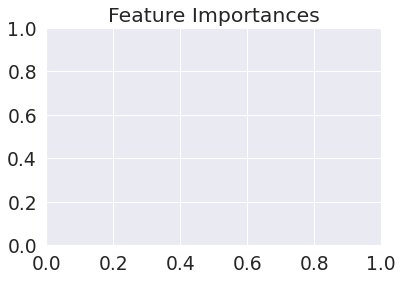

In [25]:

importances = list(rf.feature_importances_)
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

调参


In [0]:
max_features = ['sqrt','log2',41,42]
 
for m in max_features :
    rf = RandomForestRegressor(max_features=m, n_jobs = -1,random_state =2020)
 
    rf.fit(X_train,y_train)
    
    #prediction
    prediction_test = rf.predict(X_test)
    prediction_train = rf.predict(X_train)
    #print
    rmse_train = sqrt(mean_squared_error(y_train, prediction_train))
    rmse_test = sqrt(mean_squared_error(y_test, prediction_test))
    print(m,'  ', 'rmse - train: ',rmse_train,'  ','rmse - test: ',rmse_test,'  ', 'difference:',rmse_train-rmse_test)

sqrt    rmse - train:  0.04760351199657264    rmse - test:  0.1268105693166424    difference: -0.07920705732006975
log2    rmse - train:  0.04805496060037916    rmse - test:  0.12725276460112817    difference: -0.07919780400074901
41    rmse - train:  0.04619419212989144    rmse - test:  0.12324421729188927    difference: -0.07705002516199783
42    rmse - train:  0.04610336209621928    rmse - test:  0.12361783071722654    difference: -0.07751446862100726


## **41**

In [0]:
min_samples_leaf = [8,9,10]
 
for m in min_samples_leaf :
    rf = RandomForestRegressor(max_features=41, n_jobs = -1,random_state =2020, min_samples_leaf=m)
 
    rf.fit(X_train,y_train)
    
    #prediction
    prediction_test = rf.predict(X_test)
    prediction_train = rf.predict(X_train)
    #print
    rmse_train = sqrt(mean_squared_error(y_train, prediction_train))
    rmse_test = sqrt(mean_squared_error(y_test, prediction_test))
    print(m,'  ', 'rmse - train: ',rmse_train,'  ','rmse - test: ',rmse_test,'  ', 'difference:',rmse_train-rmse_test)

8    rmse - train:  0.11488246745330585    rmse - test:  0.14944238804580043    difference: -0.034559920592494575
9    rmse - train:  0.12043593356430407    rmse - test:  0.1523055459284104    difference: -0.03186961236410632
10    rmse - train:  0.1253644340904543    rmse - test:  0.15634066217379533    difference: -0.030976228083341023


## **9**

In [0]:
min_samples_split = [10,15,20,25,30,35,40,45,50,55,60,65,70]
 
for m in min_samples_split :
    rf = RandomForestRegressor(max_features=41, n_jobs = -1,random_state =2020,min_samples_leaf=9,
         min_samples_split = m)
 
    rf.fit(X_train,y_train)
    
    #prediction
    prediction_test = rf.predict(X_test)
    prediction_train = rf.predict(X_train)
    #print
    rmse_train = sqrt(mean_squared_error(y_train, prediction_train))
    rmse_test = sqrt(mean_squared_error(y_test, prediction_test))
    print(m,'  ', 'rmse - train: ',rmse_train,'  ','rmse - test: ',rmse_test,'  ', 'difference:',rmse_train-rmse_test)

10    rmse - train:  0.12043593356430407    rmse - test:  0.1523055459284104    difference: -0.03186961236410632
15    rmse - train:  0.12043593356430407    rmse - test:  0.1523055459284104    difference: -0.03186961236410632
20    rmse - train:  0.12242299832960267    rmse - test:  0.15350189487177993    difference: -0.031078896542177256
25    rmse - train:  0.1268589050822168    rmse - test:  0.15585617911636776    difference: -0.02899727403415095
30    rmse - train:  0.1320123553727135    rmse - test:  0.15913574648596338    difference: -0.02712339111324988
35    rmse - train:  0.136002499564919    rmse - test:  0.1613278956058703    difference: -0.025325396040951298
40    rmse - train:  0.1400056106269298    rmse - test:  0.16388608997605403    difference: -0.02388047934912424
45    rmse - train:  0.1435514871456727    rmse - test:  0.16631342498772314    difference: -0.02276193784205044
50    rmse - train:  0.1470399811153653    rmse - test:  0.16901771979939592    difference: -0.

## 25-**30** 

In [0]:
n_estimators = [50,100,300,500,700,900]
 
for n in n_estimators :
    rf = RandomForestRegressor(n_estimators = n, n_jobs = -1,random_state =2020)
 
    rf.fit(X_train,y_train)
    
    #prediction
    prediction_test = rf.predict(X_test)
    prediction_train = rf.predict(X_train)
    #print
    rmse_train = sqrt(mean_squared_error(y_train, prediction_train))
    rmse_test = sqrt(mean_squared_error(y_test, prediction_test))
    print(n ,'  ', 'rmse - train: ',rmse_train,'  ','rmse - test: ',rmse_test,'  ', 'difference:',rmse_train-rmse_test)

50    rmse - train:  0.048654429195864254    rmse - test:  0.12837038449906724    difference: -0.07971595530320298
100    rmse - train:  0.04716465600801669    rmse - test:  0.12743018584995247    difference: -0.08026552984193577
300    rmse - train:  0.04613310429392947    rmse - test:  0.12653783961162313    difference: -0.08040473531769365
500    rmse - train:  0.04601559709428495    rmse - test:  0.1265052096994265    difference: -0.08048961260514154
700    rmse - train:  0.0459437598072701    rmse - test:  0.1263543332564459    difference: -0.0804105734491758
900    rmse - train:  0.045925441775703985    rmse - test:  0.1263125507239374    difference: -0.08038710894823342


In [0]:
n_estimators = [1000,1500,1700,2000]
 
for n in n_estimators :
    rf = RandomForestRegressor(n_estimators = n, n_jobs = -1,random_state =2020)
 
    rf.fit(X_train,y_train)
    
    #prediction
    prediction_test = rf.predict(X_test)
    prediction_train = rf.predict(X_train)
    #print
    rmse_train = sqrt(mean_squared_error(y_train, prediction_train))
    rmse_test = sqrt(mean_squared_error(y_test, prediction_test))
    print(n ,'  ', 'rmse - train: ',rmse_train,'  ','rmse - test: ',rmse_test,'  ', 'difference:',rmse_train-rmse_test)

1000    rmse - train:  0.04593787327415265    rmse - test:  0.12634609107093137    difference: -0.08040821779677872


KeyboardInterrupt: ignored

## **900**

In [0]:
min_samples_split=[25,26,27,28,29,30]
for n in min_samples_split:
    kf = KFold(n_splits=5)
    KFold(n_splits=5, random_state=2020, shuffle=False)
    rmse_all = np.zeros(5)
    i=0
    print('-'*30,n,'-'*30)
    for train_index, test_index in kf.split(X_train):
        #建模
        rf = RandomForestRegressor(n_estimators=900,min_samples_split=n,min_samples_leaf=9,max_features=41,
                              bootstrap=True,n_jobs= -1)
        #训练
        rf.fit(X_train[train_index],y_train[train_index])
        #prediction
        prediction_test = rf.predict(X_train[test_index])
        prediction_train = rf.predict(X_train[train_index])
        #rmse
        rmse_test = sqrt(mean_squared_error(y_train[test_index], prediction_test))
        rmse_train = sqrt(mean_squared_error(y_train[train_index], prediction_train))
        print('-'*20,i,'-'*20)
        print('rmse - test: ',rmse_test, ' '*10, 'rmse - train: ',rmse_train)
        rmse_all[i]=rmse_test
        i += 1 
    print('rmse_mean: ', np.mean(rmse_all))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



------------------------------ 25 ------------------------------
-------------------- 0 --------------------
rmse - test:  0.15418538468816134            rmse - train:  0.1333669043903562
-------------------- 1 --------------------
rmse - test:  0.16111553054838185            rmse - train:  0.13148323163660744
-------------------- 2 --------------------
rmse - test:  0.16327262016096775            rmse - train:  0.1317309684071543
-------------------- 3 --------------------
rmse - test:  0.1551782705145764            rmse - train:  0.1330538987144022
-------------------- 4 --------------------
rmse - test:  0.16283046452669678            rmse - train:  0.13242119090076873
rmse_mean:  0.1593164540877568
------------------------------ 26 ------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



-------------------- 0 --------------------
rmse - test:  0.15478949735697559            rmse - train:  0.134320542520101
-------------------- 1 --------------------
rmse - test:  0.16160956641953933            rmse - train:  0.1325084083132662
-------------------- 2 --------------------
rmse - test:  0.16400377005779046            rmse - train:  0.1329811627937485
-------------------- 3 --------------------
rmse - test:  0.15586957283534053            rmse - train:  0.1340144336236294
-------------------- 4 --------------------
rmse - test:  0.1638930818116951            rmse - train:  0.13382257823762286
rmse_mean:  0.1600330976962682
------------------------------ 27 ------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



-------------------- 0 --------------------
rmse - test:  0.15512542936801013            rmse - train:  0.1352356334459947
-------------------- 1 --------------------
rmse - test:  0.16194140702558785            rmse - train:  0.13333851966953914
-------------------- 2 --------------------
rmse - test:  0.164429577119335            rmse - train:  0.1337421073856917
-------------------- 3 --------------------
rmse - test:  0.15634367666934912            rmse - train:  0.13489940600330816
-------------------- 4 --------------------
rmse - test:  0.16406381305116974            rmse - train:  0.1345577536807675
rmse_mean:  0.16038078064669037
------------------------------ 28 ------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



-------------------- 0 --------------------
rmse - test:  0.15592394641503157            rmse - train:  0.1363953286580167
-------------------- 1 --------------------
rmse - test:  0.16272875670414647            rmse - train:  0.13436934545659807
-------------------- 2 --------------------
rmse - test:  0.16521453320646112            rmse - train:  0.13502827062449319
-------------------- 3 --------------------
rmse - test:  0.15649994353405258            rmse - train:  0.1358980819191104
-------------------- 4 --------------------
rmse - test:  0.16462571463429213            rmse - train:  0.13552586700525757
rmse_mean:  0.16099857889879676
------------------------------ 29 ------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



-------------------- 0 --------------------
rmse - test:  0.15650128097881216            rmse - train:  0.13723128703906007
-------------------- 1 --------------------
rmse - test:  0.163215950713376            rmse - train:  0.1353871913990839
-------------------- 2 --------------------
rmse - test:  0.16540620404788306            rmse - train:  0.135732750103014
-------------------- 3 --------------------
rmse - test:  0.15715862350110354            rmse - train:  0.1368275072682309
-------------------- 4 --------------------
rmse - test:  0.16489057805607513            rmse - train:  0.1363223146752757
rmse_mean:  0.16143452745944997
------------------------------ 30 ------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



-------------------- 0 --------------------
rmse - test:  0.15684297346177953            rmse - train:  0.13823115666605829
-------------------- 1 --------------------
rmse - test:  0.16419106321546545            rmse - train:  0.13664591859489011
-------------------- 2 --------------------
rmse - test:  0.1661159097879693            rmse - train:  0.13672993188263927
-------------------- 3 --------------------
rmse - test:  0.1577983662798571            rmse - train:  0.13779829188272397
-------------------- 4 --------------------
rmse - test:  0.16598771782555574            rmse - train:  0.13734907065105
rmse_mean:  0.16218720611412543


In [0]:
kf = KFold(n_splits=5)
KFold(n_splits=5, random_state=2020, shuffle=False)
rmse_all = np.zeros(5)
i=0
for train_index, test_index in kf.split(X_train):
    #建模
    rf = RandomForestRegressor(n_estimators=900,min_samples_split=25,min_samples_leaf=9,max_features=41,
                              bootstrap=True, n_jobs=-1)
    #训练
    rf.fit(X_train[train_index],y_train[train_index])
    #prediction
    prediction_test = rf.predict(X_train[test_index])
    prediction_train = rf.predict(X_train[train_index])
    #rmse
    rmse_test = sqrt(mean_squared_error(y_train[test_index], prediction_test))
    rmse_train = sqrt(mean_squared_error(y_train[train_index], prediction_train))
    print('-'*20,i,'-'*20)
    print('rmse - test: ',rmse_test, ' '*10, 'rmse - train: ',rmse_train)
    rmse_all[i]=rmse_test
    i += 1 
print('rmse_mean: ', np.mean(rmse_all))


rf.fit(X_train,y_train)
prediction_test = rf.predict(X_test)
rmse_test = sqrt(mean_squared_error(y_test, prediction_test))
print('rmse_test:', rmse_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



-------------------- 0 --------------------
rmse - test:  0.15403519942238092            rmse - train:  0.13329610702557615
-------------------- 1 --------------------
rmse - test:  0.16110725227269576            rmse - train:  0.13168025919743115
-------------------- 2 --------------------
rmse - test:  0.16307321954670592            rmse - train:  0.13173041557179316
-------------------- 3 --------------------
rmse - test:  0.15489429670044252            rmse - train:  0.13279522223618018
-------------------- 4 --------------------
rmse - test:  0.16314172654446726            rmse - train:  0.13263926552066763
rmse_mean:  0.15925033889733847
rmse_test: 0.1555716991692449


In [0]:
df_feature_list = list(X_train.columns)
# get the feature importance
importances = list(rf.feature_importances_)

# transform the formula
feature_importances = [(feature, importance) for feature, importance in zip(df_feature_list, importances)]

# descending order
feature_importances = sorted(feature_importances, key= lambda x:x[1], reverse=True)

# print out
for a in feature_importances:
    print('Variable: {}      Importance:{}'.format(a[0],a[1]))

AttributeError: ignored